In [102]:
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import chi2_contingency


In [103]:
df = pd.read_csv(r'C:\Users\CAMNG3\Downloads\dataset.csv')


In [104]:
# no null
df.isna().any().sum()

np.int64(0)

In [105]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [106]:
#encode the label 
df['Attrition'] = df['Attrition'].map(lambda x : 0 if x == 'No' else 1) 
# count the Attrition samples for each class, (df.Attrition.value_counts()) do we have an imbalancement problem ?? what do we do ? 

In [107]:
df.dtypes
# next step is to encode everything that is not int 

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [108]:
#I would get rid of Marital Status and Gender -- whether or not keeping these featurs is based on the context 
#In this case you want to ensure that decisions are not influenced by gender or marital status, hence promoting fairness and ethics 
# you need to check potential correlation with other features and the target variable

# Encoding categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

# Contingency tables
contingency_table_gender = pd.crosstab(df['Gender'], df['Attrition'])
contingency_table_marital = pd.crosstab(df['MaritalStatus'], df['Attrition'])

print("Contingency Table - Gender vs Target:")
print(contingency_table_gender)

print("\nContingency Table - Marital Status vs Target:")
print(contingency_table_marital)

# Chi-Square tests
chi2_gender, p_gender, dof_gender, ex_gender = chi2_contingency(contingency_table_gender)
chi2_marital, p_marital, dof_marital, ex_marital = chi2_contingency(contingency_table_marital)

print(f"\nChi-Square Test between gender and target: chi2 = {chi2_gender}, p-value = {p_gender}")
print(f"Chi-Square Test between marital_status and target: chi2 = {chi2_marital}, p-value = {p_marital}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_gender < alpha:
    print("There is a significant association between gender and target (p < 0.05).")
else:
    print("There is no significant association between gender and target (p >= 0.05).")

if p_marital < alpha:
    print("There is a significant association between marital status and target (p < 0.05).")
else:
    print("There is no significant association between marital status and target (p >= 0.05).")



df.drop(columns=['MaritalStatus'], inplace=True)

Contingency Table - Gender vs Target:
Attrition    0    1
Gender             
0          501   87
1          732  150

Contingency Table - Marital Status vs Target:
Attrition        0    1
MaritalStatus          
0              350  120
1              589   84
2              294   33

Chi-Square Test between gender and target: chi2 = 1.1169671241970975, p-value = 0.29057244902890855
Chi-Square Test between marital_status and target: chi2 = 46.163676540848705, p-value = 9.455511060340833e-11

Interpretation:
There is no significant association between gender and target (p >= 0.05).
There is a significant association between marital status and target (p < 0.05).


In [109]:
#before proceeding with the encoding we need to check how many distinct values the feature contains 
#based on number of values we can choose the right encoding

<Axes: ylabel='Frequency'>

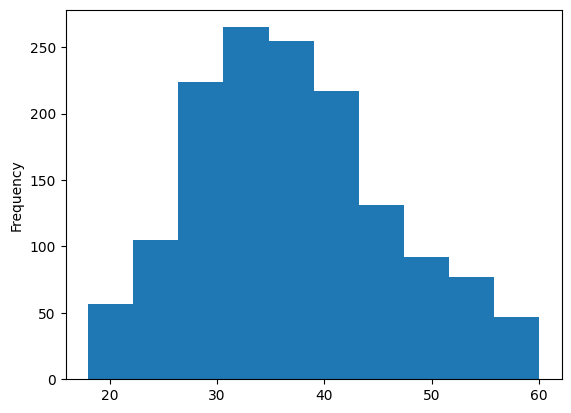

In [110]:
# now all other categories can be easily split into bins -- will show you example and then you can do it the rest 

# Age 
df.Age.plot.hist()
# based on the distribution let's split into 5 bins 

In [111]:
sorted_values = df.sort_values(by='Age').reset_index(drop=True)
bins = ['x<30', '29<x<35', '34<x<39', '44<x<46', '44<x<61']
idxs = [int(sorted_values.iloc[(294-1)*i].Age) for i in range(1,6)]
intervals = list(zip(bins,idxs))

def match_intervals(value):
    for x in intervals:
        if value <= x[1]:
            return x[0]
    return value  # return original value if it doesn't match any interval

df['Age'] = df['Age'].apply(match_intervals)

In [112]:
    df['Age'].value_counts()

Age
x<30       326
29<x<35    325
44<x<46    291
44<x<61    273
34<x<39    255
Name: count, dtype: int64

In [113]:
# Business Travel

df['BusinessTravel'].value_counts()
# in this case we will use label encoding -- you should check the reason !! we could have choosen one-hot but we didn't ...
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: 0 if x =='Non-Travel' else (1 if x == 'Travel_Rarely' else 2))

# Department

df['Department'].value_counts()
department_dummies = pd.get_dummies(df['Department'], prefix='Department', dtype=float) # why now we used one-hot encoding and not label encoding?
df.drop(columns=['Department'], inplace=True)
df = pd.concat([df,department_dummies], axis=1)

# Education Field and JobRole

for field in ['JobRole', 'EducationField', 'Age']:

    df[field].value_counts()
    lb = preprocessing.LabelBinarizer()
    new_data = lb.fit_transform(df[field])
    binary_df = pd.DataFrame(new_data, columns=lb.classes_)
    df.drop(columns=[field], inplace=True)
    pd.concat([df,binary_df], axis=1)

# Over18

#Let's remove over18 since there is no variance 
df.drop(columns=['Over18'], inplace=True)

# OverTime

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [123]:
BUCKET_URI = "gs://pipeline_hr_analytics/"
FOLDER = "pre_processed_data/"

path = "".join([BUCKET_URI, FOLDER])

df.to_csv(path + 'pre_processed_data.csv', index=False)

In [125]:
# Will show you how to set up automl 

# First create a dataset 

import os

from google.cloud import aiplatform

PROJECT_ID = "prj-dev-mlcc-flt-01-bbc1"
REGION = "us-west4"

aiplatform.init(project=PROJECT_ID, location=REGION)

dataset = aiplatform.TabularDataset.create(
    display_name="HR Analytics",
    gcs_source=f"{path}pre_processed_data.csv",
)

label_column = "Attrition"

print(dataset.resource_name)
     

Creating TabularDataset
Create TabularDataset backing LRO: projects/972418686530/locations/us-west4/datasets/7862897921295908864/operations/5099426077973938176
TabularDataset created. Resource name: projects/972418686530/locations/us-west4/datasets/7862897921295908864
To use this TabularDataset in another session:
ds = aiplatform.TabularDataset('projects/972418686530/locations/us-west4/datasets/7862897921295908864')
projects/972418686530/locations/us-west4/datasets/7862897921295908864


In [134]:
job = aiplatform.AutoMLTabularTrainingJob(
  display_name="train-automl-hr-analytics",
  optimization_prediction_type="classification",
  optimization_objective="maximize-au-prc",
)

model = job.run(
    dataset=dataset,
    target_column=label_column,
    training_fraction_split=0.6,
    validation_fraction_split=0.2,
    test_fraction_split=0.2,
    budget_milli_node_hours=1000,
    model_display_name="test",
    disable_early_stopping=False,
)

No column transformations provided, so now retrieving columns from dataset in order to set default column transformations.
The column transformation of type 'auto' was set for the following columns: ['JobInvolvement', 'DailyRate', 'WorkLifeBalance', 'NumCompaniesWorked', 'OverTime', 'JobSatisfaction', 'Education', 'YearsSinceLastPromotion', 'Department_Research & Development', 'JobLevel', 'PercentSalaryHike', 'YearsAtCompany', 'EmployeeNumber', 'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'EmployeeCount', 'TrainingTimesLastYear', 'MonthlyRate', 'BusinessTravel', 'StandardHours', 'TotalWorkingYears', 'YearsWithCurrManager', 'HourlyRate', 'Gender', 'YearsInCurrentRole', 'EnvironmentSatisfaction', 'DistanceFromHome', 'Department_Human Resources', 'Department_Sales', 'MonthlyIncome'].
View Training:
https://console.cloud.google.com/ai/platform/locations/us-west4/training/7218366404116873216?project=972418686530
AutoMLTabularTrainingJob projects/972418686530/location

KeyboardInterrupt: 